In [150]:
import nibabel as nib
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [154]:
# MATLAB 2D to nibabel 4D 
# load brain mask
brain_mask = nib.load('/data/MNI152/MNI152_T1_2mm_brain_mask_filled.nii.gz').get_fdata()
# linear indices into the 3D cube (229694 x 1)
# # returns list of x, y, z coordinate as 3 vectors
# bm_inds = np.where(brain_mask==1)

# returns list of (x, y, z) coordinates
bm_inds = np.argwhere(brain_mask==1)

# 2D matrix created using matlab 
# due to the difference between matrix implementation in Matlab and in Python numpy
# here we sort z first then y then x [coz matlab does (x, y, z) while python expects (z, y, x)]

sorted_bm_inds = sorted(bm_inds , key=lambda k: [k[2], k[1], k[0]])
inds = np.array(sorted_bm_inds)

# load fMRI 2D matrix from example scan
scan = sio.loadmat('/data/TESTING/Ybfd_100206_3T_rfMRI_REST2_LR.mat')
scan = scan['Ybfd']
# scan = scan['Ybfd_clean_RV']

# initialize (x,y,z,time)  
vol4d = np.zeros((91,109,91,600))

# fill each 3D volume (time point) with the appropriate data:
for tt in range(len(prv)):
    vol_tt = np.zeros(brain_mask.shape)
    vol_tt[inds[:,0],inds[:,1],inds[:,2]] = scan[tt,:] 
    vol4d[:,:,:,tt] = vol_tt

In [145]:
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices), figsize=(10,3))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

Text(0.5, 0.98, 'Center slices for image')

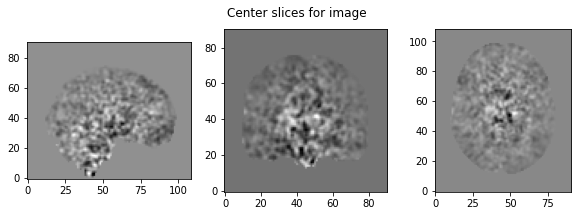

In [144]:
show_slices([vol4d[45, :, :, 1],
             vol4d[:, 54, :, 1],
             vol4d[:, :, 45, 1]])
plt.suptitle("Center slices for image")

In [155]:
# convert to and save as nifti
temp = nib.load('/bigdata/HCP_task/EMOTION2/100206/MNINonLinear/Results/tfMRI_EMOTION_LR/tfMRI_EMOTION_LR.nii.gz')
nii = nib.Nifti1Image(vol4d, affine=temp.affine)

# to visualize
nib.save(nii, '/data/TESTING/test.nii.gz')

In [51]:
# Nifti (4D) to 2D

brain_mask = nib.load('/data/MNI152/MNI152_T1_2mm_brain_mask_filled.nii.gz').get_fdata()
# linear indices into the 3D cube (229694 x 1)
bm_inds = np.where(brain_mask==1)

img = nib.load('/bigdata/HCP_task/EMOTION2/100206/MNINonLinear/Results/tfMRI_EMOTION_LR/tfMRI_EMOTION_LR.nii.gz')
data_in = img.get_data()
print(data_in.shape)
data = data_in[bm_inds]
# print(data.shape)
vol_shape = data.shape[:-1]
# print(vol_shape)
n_voxels = np.prod(vol_shape)
# print(n_voxels)
voxel_by_time = data.reshape(n_voxels, data.shape[-1])
# print(voxel_by_time.shape)

/home/bayrakrg/Tools/VENV/newest/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


(91, 109, 91, 176)
(229694, 176)


Text(0.5, 0.98, 'Center slices for image')

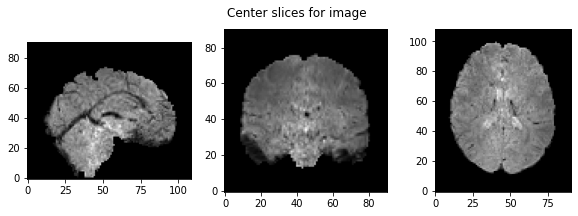

In [141]:
show_slices([data_in[45, :, :, 1],
             data_in[:, 54, :, 1],
             data_in[:, :, 45, 1]])
plt.suptitle("Center slices for image")

In [69]:
# 2D to 4D

# initialize (x,y,z,time)  
vol4d = np.zeros((91,109,91,176))

# fill each 3D volume (time point) with the appropriate data:
for tt in range(voxel_by_time.shape[1]):
    vol_tt = np.zeros((91,109,91))
    vol_tt[bm_inds] = voxel_by_time[:,tt] 
    vol4d[:,:,:,tt] = vol_tt

Text(0.5, 0.98, 'Center slices for image')

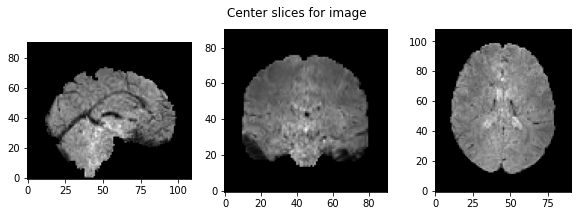

In [70]:
show_slices([vol4d[45, :, :, 1],
             vol4d[:, 54, :, 1],
             vol4d[:, :, 45, 1]])
plt.suptitle("Center slices for image")

In [78]:
# convert 4D vol to and save as nifti
# make sure TR matches or hard code
temp = nib.load('/bigdata/HCP_task/EMOTION2/100206/MNINonLinear/Results/tfMRI_EMOTION_LR/tfMRI_EMOTION_LR.nii.gz')
nii = nib.Nifti1Image(vol4d, affine=temp.affine)
nib.save(nii, '/home/bayrakrg/Desktop/test.nii.gz')

In [81]:
print(nii.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  4  91 109  91 176   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
srow_x          : [-2.  0.  0. 90.]
srow_